# Object Detection


## Install MMDetection

In [1]:
%cd /Users/yoo/PythonWorkspace/mmdetection

/Users/yoo/PythonWorkspace/mmdetection


In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install requirements.txt
!pip install -e .

In [ ]:
from mmcv import collect_env
collect_env()

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

## Inference by Faster R-CNN detector



load checkpoint from local path: ./work_dirs/yolov3_320_darknet53_e24/best_bbox_mAP_epoch_24.pth


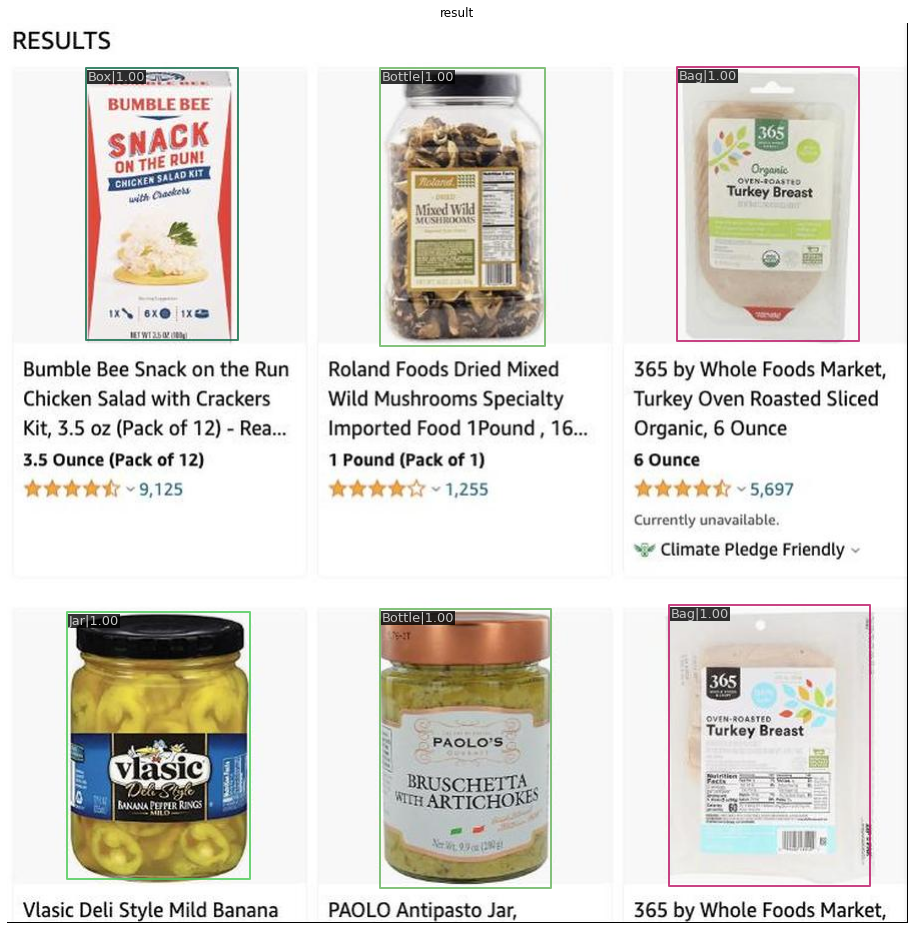

In [6]:
# Inference
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import time

# Specify the path to model config and checkpoint file
# config_file = './work_dirs/faster_rcnn_r50_e24/faster_rcnn_r50_caffe_fpn_mstrain_ecommerce.py'
# checkpoint_file = './work_dirs/faster_rcnn_r50_e24/best_bbox_mAP_epoch_21.pth'
config_file = './work_dirs/yolov3_320_darknet53_e24/yolov3_darknet53_ecommerce.py'
checkpoint_file = './work_dirs/yolov3_320_darknet53_e24/best_bbox_mAP_epoch_24.pth'

# for img in 
img_file = './demo/amazon_000.jpg'
out_file = './demo/inference/{}.jpg'.format(str(time.time()).split('.')[0])

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cpu')
result = inference_detector(model, img_file)

# visualize the results
show_result_pyplot(model, img_file, result, score_thr=0.5)

# save the visualization results to image files
# model.show_result(img_file, result, out_file=out_file)

## Screen Capture & Inference

In [2]:
# Mac
import cv2
import numpy as np
import mss
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import time

def bbox_coordinates(result, threshold):
    classes = ('Bottle','Box','Bag','Can','Jar','Ampoule')

    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32)\
        for i, bbox in enumerate(result)
    ]
    labels = np.concatenate(labels)
    bboxes = np.vstack(result)
    labels_impt = np.where(bboxes[:, -1] > threshold)[0]

    labels_impt_list = [labels[i] for i in labels_impt]
    labels_class = [classes[i] for i in labels_impt_list]
    
    return bboxes[labels_impt], labels_class
    
# capture region
region = {'left':0, 'top':0, 'width':900, 'height':900}

# config_file = './work_dirs/faster_rcnn_r50_e24/faster_rcnn_r50_caffe_fpn_mstrain_ecommerce.py'
# checkpoint_file = './work_dirs/faster_rcnn_r50_e24/best_bbox_mAP_epoch_21.pth'
config_file = './work_dirs/yolov3_320_darknet53_e24/yolov3_darknet53_ecommerce.py'
checkpoint_file = './work_dirs/yolov3_320_darknet53_e24/best_bbox_mAP_epoch_24.pth'

model = init_detector(config_file, checkpoint_file, device='cpu')

while True:

    with mss.mss() as sct:
        src = np.array(sct.grab(region))[:,:,:3]
        
    img = cv2.resize(src, None, fx=0.5, fy=0.5)
    cv2.imshow("capture", img)

    if time.gmtime().tm_sec%10 == 0: # 10초에 한 번 실행
        img_ = src.copy()
        result = inference_detector(model, img_)
        bboxes, classes = bbox_coordinates(result, 0.5) # threshold

        for i, bbox in enumerate(bboxes):
            cv2.rectangle(img_, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0,0,255), 2)
            cv2.putText(img_, classes[i] + ' ' + str(round(bbox[-1], 2)), (int(bbox[0]), int(bbox[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2, cv2.LINE_AA)

        img_ = cv2.resize(img_, None, fx=0.5, fy=0.5)
        cv2.imshow("inference", img_)
    
    key = cv2.waitKey(1)

    if key == 27:
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        break

load checkpoint from local path: ./work_dirs/yolov3_320_darknet53_e24/best_bbox_mAP_epoch_24.pth
